In [195]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing,CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as skl
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatheraus/weatherAUS.csv


In [196]:
df=pd.read_csv('/kaggle/input/weatheraus/weatherAUS.csv')
df.head(10)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [198]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

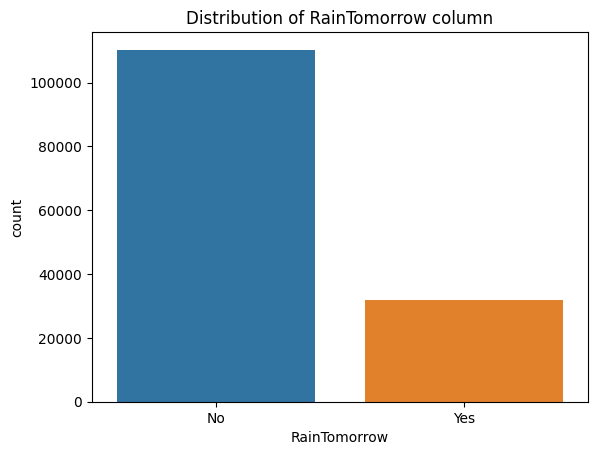

In [199]:
# Visualize the distribution of the target variable to understand the class balance
# (we can see that the classes are not balanced)
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow column')
plt.show()

In [200]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [201]:
# ckeck for the correlation between the numerical columns
corr = df.select_dtypes(include='number').corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


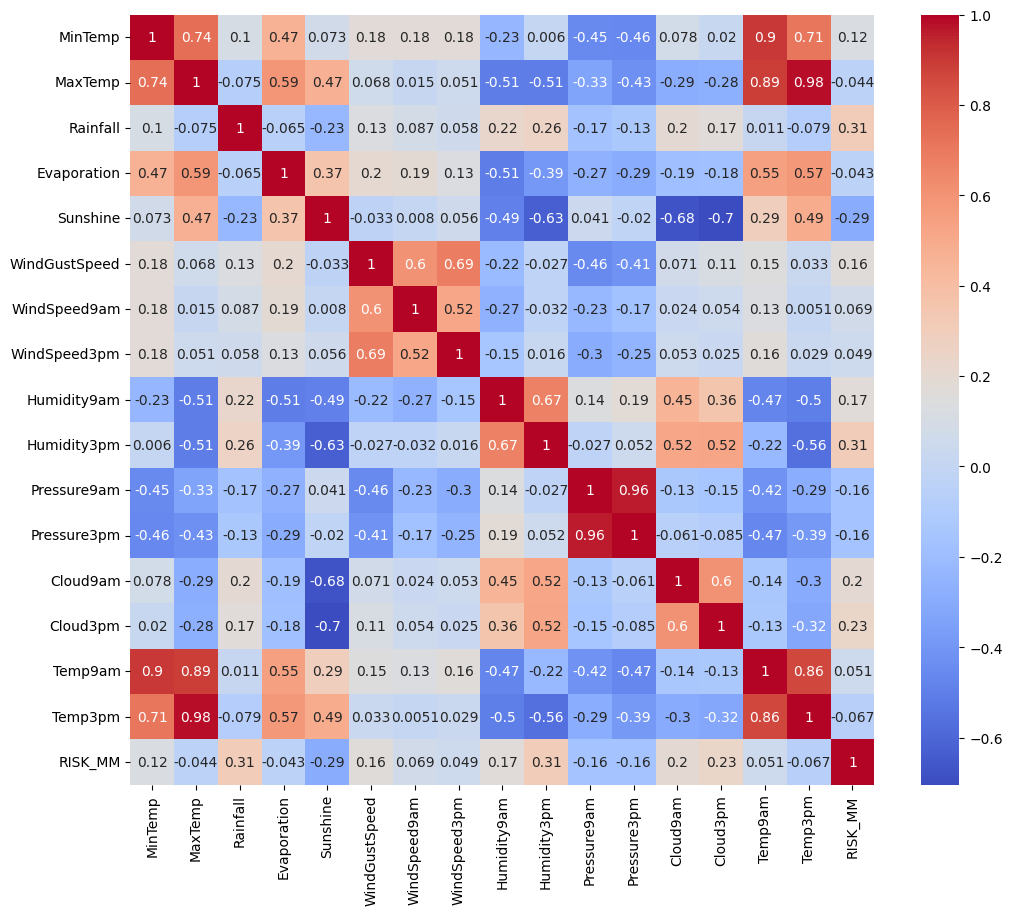

In [202]:
# ckeck for the correlation between the numerical columns using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [203]:
# drop any column haveing more than 55 thousend missing values
df = df.dropna(thresh=55000, axis=1)

In [204]:
# full all null vaues in numerical columns with the median of the column
numerical_columns = df.select_dtypes(include='number').columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

In [205]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [206]:
# fill the null values in WindGustDir, WindDir9am, WindDir3pm, and RainToday with random values from the unique values in each column except for the null values
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in categorical_columns:
    df.loc[df[col].isnull(), col] = np.random.choice(df[col].dropna().unique())

In [207]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [208]:
#convert date to day / month /year 
df['Date']=pd.to_datetime(df['Date'])
# features of the column
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [209]:
df['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
142188   2017-06-20
142189   2017-06-21
142190   2017-06-22
142191   2017-06-23
142192   2017-06-24
Name: Date, Length: 142193, dtype: datetime64[ns]

In [210]:
# Drop the original Date column
df.drop(['Date'], axis=1, inplace=True)

In [211]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,8.0,5.0,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,5.0,5.0,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,5.0,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,5.0,5.0,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,4.8,8.5,E,31.0,ESE,E,...,5.0,5.0,9.4,20.9,No,0.0,No,2017,6,20
142189,Uluru,2.8,23.4,0.0,4.8,8.5,E,31.0,SE,ENE,...,5.0,5.0,10.1,22.4,No,0.0,No,2017,6,21
142190,Uluru,3.6,25.3,0.0,4.8,8.5,NNW,22.0,SE,N,...,5.0,5.0,10.9,24.5,No,0.0,No,2017,6,22
142191,Uluru,5.4,26.9,0.0,4.8,8.5,N,37.0,SE,WNW,...,5.0,5.0,12.5,26.1,No,0.0,No,2017,6,23


In [212]:
# handel all duplicates in the dataframe
df.drop_duplicates(inplace=True)

In [213]:
# convert each object to category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [214]:
# encoding categorical columns to numerical values starting from 0
categorical_columns = df.select_dtypes(include='category').columns
for col in categorical_columns:
    df[col] = df[col].cat.codes

In [215]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,8.0,5.0,16.9,21.8,0,0.0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,5.0,5.0,17.2,24.3,0,0.0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,5.0,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,5.0,5.0,18.1,26.5,0,1.0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,41,3.5,21.8,0.0,4.8,8.5,0,31.0,2,0,...,5.0,5.0,9.4,20.9,0,0.0,0,2017,6,20
142189,41,2.8,23.4,0.0,4.8,8.5,0,31.0,9,1,...,5.0,5.0,10.1,22.4,0,0.0,0,2017,6,21
142190,41,3.6,25.3,0.0,4.8,8.5,6,22.0,9,3,...,5.0,5.0,10.9,24.5,0,0.0,0,2017,6,22
142191,41,5.4,26.9,0.0,4.8,8.5,3,37.0,9,14,...,5.0,5.0,12.5,26.1,0,0.0,0,2017,6,23


In [216]:
df.dtypes

Location            int8
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir         int8
WindGustSpeed    float64
WindDir9am          int8
WindDir3pm          int8
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday           int8
RISK_MM          float64
RainTomorrow        int8
Year               int32
Month              int32
Day                int32
dtype: object

In [217]:
#initialize x and y  
x=df.drop(columns='RainTomorrow',axis=1)
y=df['RainTomorrow']


In [218]:
#scale outliers
scaler = RobustScaler() 
X_scaler = scaler.fit_transform(x)

In [219]:
X_scaler

array([[-0.88      ,  0.15217391,  0.02912621, ..., -1.25      ,
         1.        , -1.        ],
       [-0.88      , -0.5       ,  0.24271845, ..., -1.25      ,
         1.        , -0.93333333],
       [-0.88      ,  0.09782609,  0.30097087, ..., -1.25      ,
         1.        , -0.86666667],
       ...,
       [ 0.68      , -0.91304348,  0.26213592, ...,  1.        ,
         0.        ,  0.4       ],
       [ 0.68      , -0.7173913 ,  0.41747573, ...,  1.        ,
         0.        ,  0.46666667],
       [ 0.68      , -0.45652174,  0.42718447, ...,  1.        ,
         0.        ,  0.53333333]])

In [220]:
#splitting the date into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X_scaler, 
                       y, test_size= 0.20, random_state=100, stratify=y)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)


X_train =  (113754, 25)  y_train =  (113754,)
X_test  =  (28439, 25)  y_test  =  (28439,)


In [221]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
Models= {
    'LR':LogisticRegression(max_iter=1000,random_state=42),
    'DT':DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'NB': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'svc': SVC()   
}


In [223]:
for name,model in Models.items():
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    
    print('MODEL')
    print('confusion matrix is :\n ',confusion_matrix(y_test,y_pred))
    print('accuracy score is   :  \n ',accuracy_score(y_test,y_pred))
    print ('classification report : \n', classification_report(y_test,y_pred))


MODEL
confusion matrix is :
  [[22064     0]
 [    1  6374]]
accuracy score is   :  
  0.9999648370195858
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22064
           1       1.00      1.00      1.00      6375

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439

MODEL
confusion matrix is :
  [[22064     0]
 [    0  6375]]
accuracy score is   :  
  1.0
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22064
           1       1.00      1.00      1.00      6375

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439

MODEL
confusion matrix is :
  [[22064     0]
 [    0  6375]]
accuracy score is   :  
  1.0
classi

In [ ]:
# LOGISTIC REGRESSION
Models['LR'].fit(X_train,y_train)
lr_pred=Models['LR'].predict(X_test)
print('confusion matrix is :\n ',confusion_matrix(y_test,lr_pred))
print('accuracy score is   :  \n ',accuracy_score(y_test,lr_pred))
print ('classification report : \n', classification_report(y_test,lr_pred))


In [ ]:
# Calculate confusion matrix for Logistic Regression after PCA
conf_matrix_logreg_pca = confusion_matrix(y_test, lr_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Decion Tree 
Models['DT'].fit(X_train,y_train)
dt_pred=Models['DT'].predict(X_test)
print('confusion matrix is :\n ',confusion_matrix(y_test,dt_pred))
print('accuracy score is   :  \n ',accuracy_score(y_test,dt_pred))
print ('classification report : \n', classification_report(y_test,dt_pred))

In [ ]:
# Calculate confusion matrix for Decision Tree after PCA
conf_matrix_tree_pca = confusion_matrix(y_test, dt_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Decision Tree Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
Models['NB'].fit(X_train, y_train)

# Predict and evaluate
y_pred_nb_pca = Models['NB'].predict(X_test)

print("Naive Bayes Performance :")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_pca))
print("Precision:", precision_score(y_test, y_pred_nb_pca))
print("Recall:", recall_score(y_test, y_pred_nb_pca))
print("F1 Score:", f1_score(y_test, y_pred_nb_pca))
print(classification_report(y_test, y_pred_nb_pca))

In [ ]:
# Calculate confusion matrix for Naive Bayes after PCA
conf_matrix_nb_pca = confusion_matrix(y_test, y_pred_nb_pca)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Naive Bayes Confusion Matrix (')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#RANDOM FOREST 
# Initialize and train the model
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf_pca = RF.predict(X_test)

print("Random Forest Performance after PCA:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_pca))
print("Precision:", precision_score(y_test, y_pred_rf_pca))
print("Recall:", recall_score(y_test, y_pred_rf_pca))
print("F1 Score:", f1_score(y_test, y_pred_rf_pca))
print(classification_report(y_test, y_pred_rf_pca))
print(confusion_matrix(y_test, y_pred_rf_pca))

In [ ]:
# Calculate confusion matrix for Random Forest after PCA
conf_matrix_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest Confusion Matrix (After PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [224]:
#NN
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential()
model.add(keras.layers.Dense(32,  activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [225]:
# Compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [226]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9145 - loss: 0.1950 - val_accuracy: 0.9932 - val_loss: 0.0173
Epoch 2/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9946 - loss: 0.0147 - val_accuracy: 0.9956 - val_loss: 0.0111
Epoch 3/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9973 - val_loss: 0.0078
Epoch 4/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9982 - loss: 0.0070 - val_accuracy: 0.9975 - val_loss: 0.0068
Epoch 5/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9949 - val_loss: 0.0179
Epoch 6/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9997 - val_loss: 0.0027
Epoch 7/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9997 - loss: 0.0026 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 8/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 0

In [227]:
history.history

{'accuracy': [0.9721987247467041,
  0.9949781894683838,
  0.9968462586402893,
  0.9982198476791382,
  0.9988352060317993,
  0.9989340901374817,
  0.9996923208236694,
  0.9998900890350342,
  0.9996593594551086,
  0.9994285702705383,
  0.9999450445175171,
  0.9993956089019775,
  0.9996044039726257,
  1.0,
  0.9994725584983826,
  0.9996923208236694,
  0.9997692108154297,
  0.9999120831489563,
  0.9995055198669434,
  0.9998681545257568,
  0.9997032880783081,
  0.9998681545257568,
  0.9995824098587036,
  0.9998900890350342,
  0.9998461604118347,
  0.9998681545257568,
  0.9996153712272644,
  0.9997252821922302,
  0.9998022317886353,
  0.9996263980865479,
  0.9998571276664734,
  1.0,
  0.9996153712272644,
  0.9999450445175171,
  0.9997472763061523,
  0.9997802376747131,
  0.9998241662979126,
  0.9996923208236694,
  0.9998791217803955,
  0.999835193157196,
  0.9997802376747131,
  0.9998461604118347,
  0.9998571276664734,
  0.9997692108154297,
  0.9998791217803955,
  0.9997362494468689,
  0.999

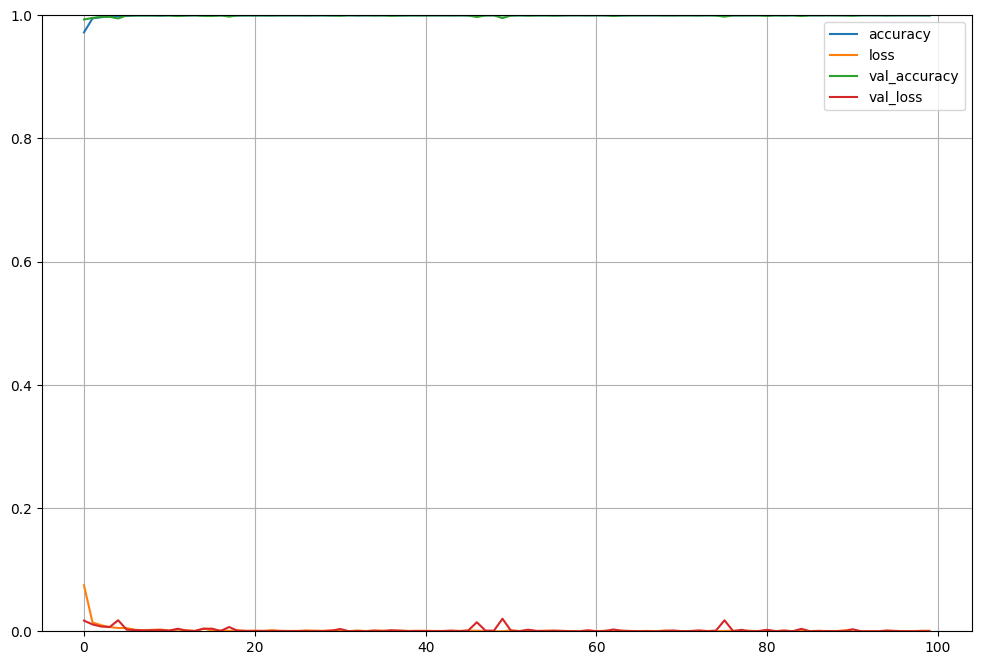

889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 8.7231e-05
Loss     :  7.747794734314084e-05
accuracy :  0.9999648332595825


In [228]:
# Plot the learning curves

pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

In [229]:
import joblib
joblib.dump(RF, "random_forest_model.pkl")


['random_forest_model.pkl']